<a href="https://colab.research.google.com/github/Srinishaa/GRIP-tasks/blob/Task2/Prediction_using_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2- Prediction using Unsupervised ML** 

#Imports

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [ ]:
dataset=load_iris()
type(dataset)

sklearn.utils.Bunch

Converting data from type Bunch to a pandas DataFrame

In [ ]:
iris_data=pd.DataFrame(dataset.data,columns=dataset.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Dropping colums sepal length and sepal width

iris_data.drop(['sepal length (cm)','sepal width (cm)'],axis='columns',inplace=True)
iris_data.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


## Scatter plot of petal length vs petal width

[]

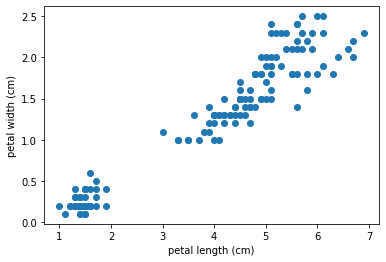

In [ ]:
plt.scatter(iris_data['petal length (cm)'],iris_data['petal width (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.plot()

The plot does not give a clear visualisation to choose a K value so we use the Elbow method to do the same.


# Elbow Plot

In [ ]:
sse=[]
for i in range(1,10):
  km=KMeans(n_clusters=i)
  km.fit(iris_data)
  sse.append(km.inertia_)
sse


[550.8953333333334,
 86.39021984551397,
 31.371358974358973,
 19.465989010989013,
 13.916908757908757,
 11.040239971910452,
 9.468834447229183,
 7.68734126984127,
 6.456494541406307]

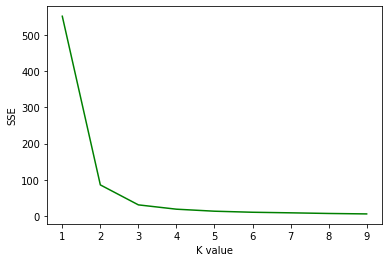

In [ ]:
plt.plot(range(1,10),sse,color='green')
plt.xlabel('K value')
plt.ylabel('SSE')
plt.show()

Elbow point is at 3 so we choose the k value as 3

In [ ]:
iris_km=KMeans(n_clusters=3)
clusters=iris_km.fit_predict(iris_data)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
# Adding clusters as a column to dataframe iris_data
iris_data['Clusters']=clusters
iris_data.tail()

,petal length (cm),petal width (cm),Clusters
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2
149,5.1,1.8,2


# Plotting the KMeans Clusters

In [ ]:
# km cluster centroids
iris_km.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

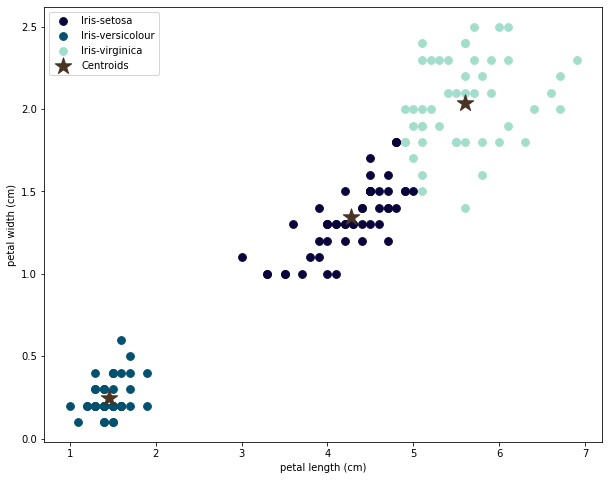

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(iris_data[iris_data.Clusters==0]['petal length (cm)'],iris_data[iris_data.Clusters==0]['petal width (cm)'],color='#0a043c',s=60,label = 'Iris-setosa')
plt.scatter(iris_data[iris_data.Clusters==1]['petal length (cm)'],iris_data[iris_data.Clusters==1]['petal width (cm)'],color='#03506f',s=60,label = 'Iris-versicolour')
plt.scatter(iris_data[iris_data.Clusters==2]['petal length (cm)'],iris_data[iris_data.Clusters==2]['petal width (cm)'],color='#a3ddcb',s=60,label = 'Iris-virginica')
plt.scatter(iris_km.cluster_centers_[:,0],iris_km.cluster_centers_[:,1],marker='*',color='#493323',s=300,label = 'Centroids')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()